## Problem 1 (Principal component analysis)

(a)
單位的不同（billions or millions）便會造成彼此資料變異量不同，假如是相差20億，在boss那邊僅相差2單位，而如果是Joe的話卻有2000單位的差距，彼此資料分布的標準差／變異數變相差很大

(b) 兩者應先在進行數據分析之前統一單位，或是將資料標準化(如 log normalization )

## Problem 2 (Principal component analysis)

見HW4_2.pdf

## Problem 3 (Principal component analysis)

In [131]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [138]:
mat = scipy.io.loadmat('04HW2_noisy.mat')
total_face = np.array(mat['X'])
face10 = total_face[:,10].reshape(28, 20)

In [133]:
def svd_compression(img, k):
    res_image = np.zeros_like(img)
    
    U, Sigma, VT = np.linalg.svd(img)
    res_image[:,:] = U[:,:k].dot(np.diag(Sigma[:k])).dot(VT[:k,:])
 
    return res_image

In [134]:
def show_face(number, k):
    face = total_face[:, number].reshape(28, 20)
    denoise_face = svd_compression(face, k)

    plt.figure(figsize=(6,4))
    plt.suptitle(f'face number: {number}')
    plt.subplot(1,2,1)
    plt.imshow(face, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(f"Original")

    plt.subplot(1,2,2)
    plt.imshow(denoise_face, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title(f"Denoise (k={k})")
    plt.show()

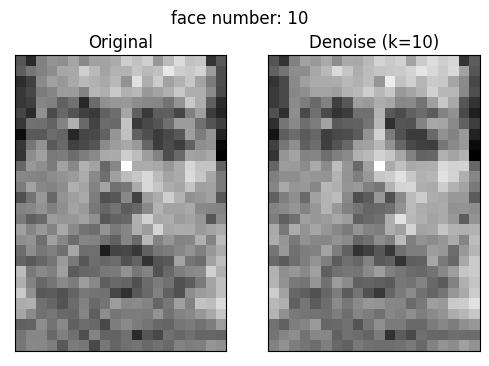

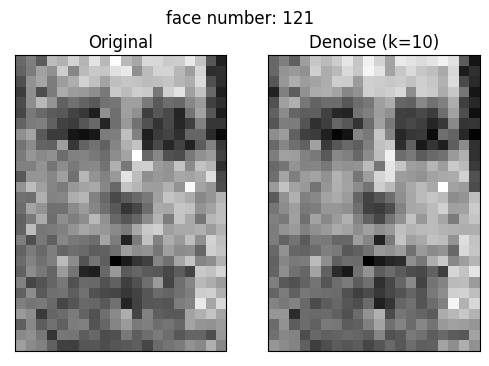

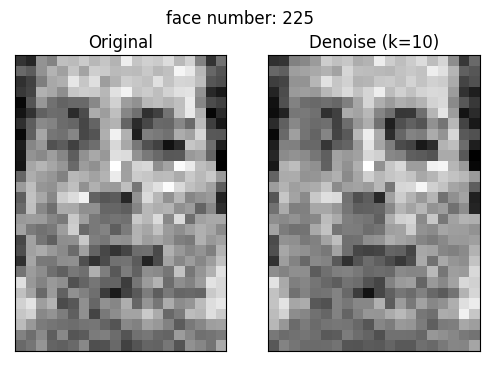

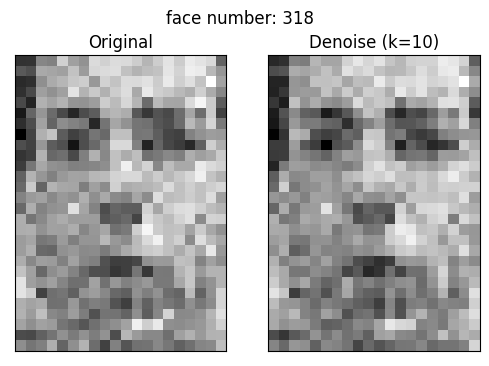

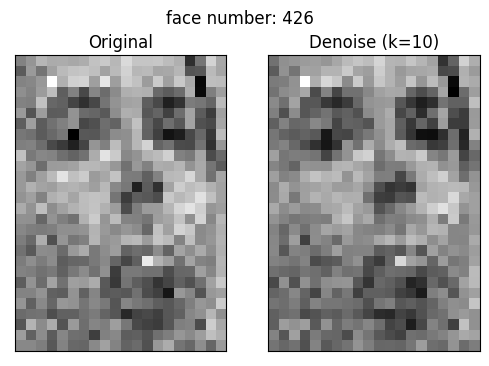

In [135]:
show_face(number=10, k=10)
show_face(number=121, k=10)
show_face(number=225, k=10)
show_face(number=318, k=10)
show_face(number=426, k=10)

可以發現目前的表前仍不佳